In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import *
from math import pi
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/Premalatha-success/Datasets/main/TaxiFare.csv")

In [4]:
df.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [5]:
df.shape

(50000, 8)

In [6]:
df.dtypes

unique_id                object
amount                  float64
date_time_of_pickup      object
longitude_of_pickup     float64
latitude_of_pickup      float64
longitude_of_dropoff    float64
latitude_of_dropoff     float64
no_of_passenger           int64
dtype: object

In [7]:
df.size

400000

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   unique_id             50000 non-null  object 
 1   amount                50000 non-null  float64
 2   date_time_of_pickup   50000 non-null  object 
 3   longitude_of_pickup   50000 non-null  float64
 4   latitude_of_pickup    50000 non-null  float64
 5   longitude_of_dropoff  50000 non-null  float64
 6   latitude_of_dropoff   50000 non-null  float64
 7   no_of_passenger       50000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 3.1+ MB


In [9]:
df.isnull().sum()

unique_id               0
amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
dtype: int64

In [10]:
df.describe()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,11.364171,-72.509756,39.933759,-72.504616,39.926251,1.667840
std,9.685557,10.393860,6.224857,10.407570,6.014737,1.289195
min,-5.000000,-75.423848,-74.006893,-84.654241,-74.006377,0.000000
25%,6.000000,-73.992062,40.734880,-73.991152,40.734372,1.000000
50%,8.500000,-73.981840,40.752678,-73.980082,40.753372,1.000000
75%,12.500000,-73.967148,40.767360,-73.963584,40.768167,2.000000
max,200.000000,40.783472,401.083332,40.851027,43.415190,6.000000


In [11]:
df.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [12]:
df.drop("unique_id", axis=1, inplace=True)

In [13]:
df.head()

,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [14]:
#Explored in google how to get details from object datatype date_time_of_pickup to convert to date_time object

df['date_time_of_pickup'] = pd.to_datetime(df['date_time_of_pickup'], format= "%Y-%m-%d %H:%M:%S UTC")

df['Year'] = df.date_time_of_pickup.apply(lambda t: t.year)
df['Weekday'] = df.date_time_of_pickup.apply(lambda t: t.weekday())
df['Hour'] = df.date_time_of_pickup.apply(lambda t: t.hour)

In [15]:
df.head()

,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,Year,Weekday,Hour
0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1,2009,0,17
1,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,16
2,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2,2011,3,0
3,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1,2012,5,4
4,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1,2010,1,7


In [16]:
#Weekday 0 means Monday and weekday 6 means Sunday
#I also browsed how to calculate distance between two geo-locations using haversine library

In [17]:
!pip install haversine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [18]:
import haversine as hs

In [19]:
#But haversine didnt workout so I tought I could directly use formula to calculate distance

In [20]:
#I got this formula from google to calculae distance

def distance(lat1, lon1, lat2, lon2):
    
    p = 0.017453292519943295 # Pi/180
    a = 0.5 - np.cos((lat2 - lat1) * p)/2 + np.cos(lat1 * p) * np.cos(lat2 * p) * (1 - np.cos((lon2 - lon1) * p)) / 2
    return 0.6213712 * 12742 * np.arcsin(np.sqrt(a))

In [21]:
df['Distance_KM'] = distance(df.latitude_of_pickup, df.longitude_of_pickup, df.latitude_of_dropoff, df.longitude_of_dropoff)
df.head()

,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,Year,Weekday,Hour,Distance_KM
0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1,2009,0,17,0.640487
1,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,16,5.250670
2,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2,2011,3,0,0.863411
3,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1,2012,5,4,1.739386
4,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1,2010,1,7,1.242218


In [22]:
df = df.drop("date_time_of_pickup", axis=1)
df.head()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,Year,Weekday,Hour,Distance_KM
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,2009,0,17,0.640487
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,16,5.250670
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,2011,3,0,0.863411
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,2012,5,4,1.739386
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,2010,1,7,1.242218


In [23]:
df.shape

(50000, 10)

In [24]:
df.size

500000

In [25]:
df.isnull().sum()

amount                  0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
Year                    0
Weekday                 0
Hour                    0
Distance_KM             0
dtype: int64

In [26]:
#Removing wrong or miscallaneous values 
df = df[df.Distance_KM > 0]
df = df[df.amount > 0]
df.shape

(48542, 10)

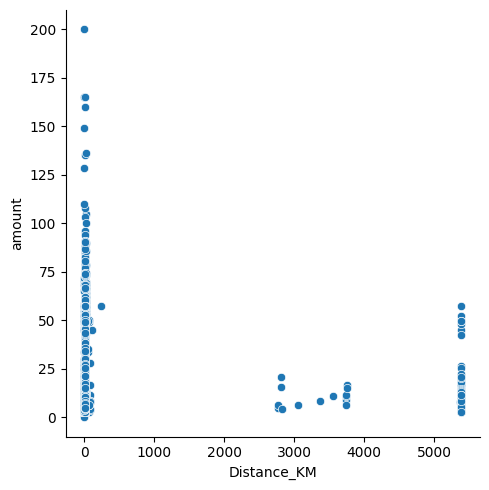

In [27]:
sns.relplot(x=df.Distance_KM,y=df.amount,data=df)

In [28]:
df1 = df[df.Distance_KM < 100]

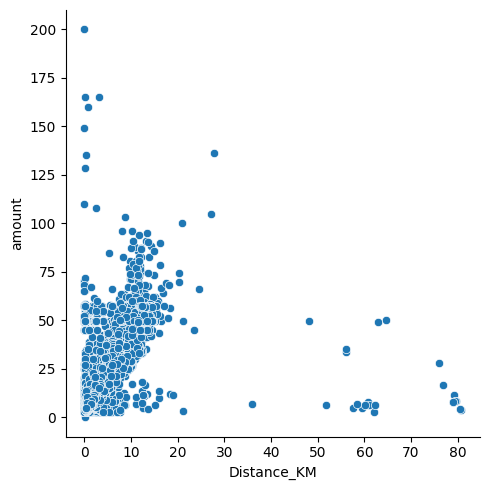

In [29]:
sns.relplot(x=df1.Distance_KM,y=df1.amount,data=df1)

Text(0.5, 0, 'Fare_Amount')

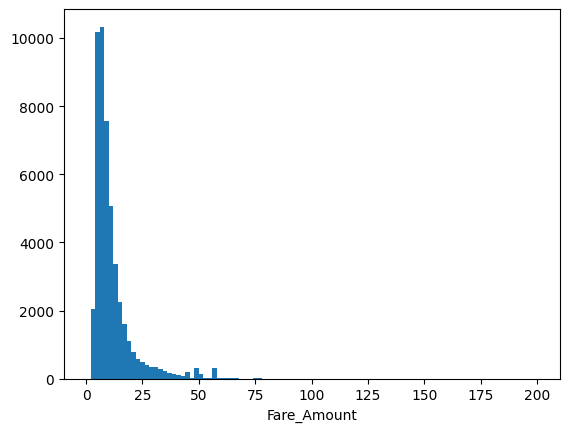

In [30]:
#There are some outliers but we cant remove them because there are multiple factors for amount

plt.hist(df['amount'], bins=100)
plt.xlabel("Fare_Amount")

In [31]:
df.Year.unique()

array([2009, 2010, 2011, 2012, 2013, 2014, 2015])

<Axes: xlabel='Year', ylabel='count'>

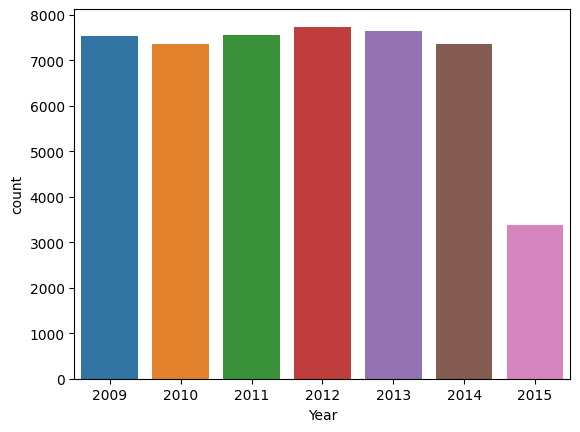

In [32]:
#Number of rides in each year

sns.countplot(x = "Year", data=df)

([<matplotlib.patches.Wedge at 0x7fcac92b8370>,
 [Text(0.9748604318669358, 0.5095558245964926, 'Monday'),
  Text(0.13901916474641077, 1.0911799447539394, 'Tuesday'),
  Text(-0.8054179202423911, 0.7492008901172112, 'Wednesday'),
  Text(-1.0840194120125877, -0.18682054057272138, 'Thursday'),
  Text(-0.5403955842631534, -0.9581088729935057, 'Friday'),
  Text(0.3635133655933492, -1.0381994187221433, 'Saturday'),
  Text(1.009316793202763, -0.43735524572010287, 'Sunday')],
 [Text(0.5317420537456012, 0.27793954068899596, '15%'),
  Text(0.07582863531622404, 0.595189060774876, '15%'),
  Text(-0.43931886558675876, 0.40865503097302425, '15%'),
  Text(-0.5912833156432296, -0.10190211303966619, '14%'),
  Text(-0.29476122777990177, -0.5226048398146393, '14%'),
  Text(0.19828001759637226, -0.5662905920302599, '13%'),
  Text(0.5505364326560523, -0.23855740675641973, '13%')])

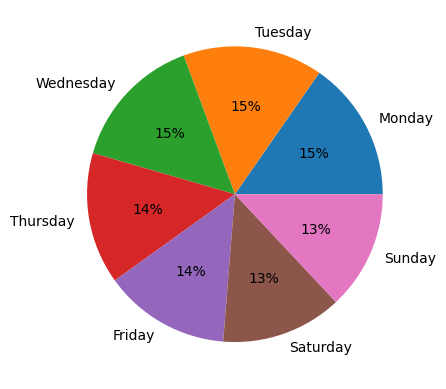

In [33]:
days = {'Monday':0, 'Tuesday':1, 'Wednesday':2, 'Thursday':3, 'Friday':4, 'Saturday':5, 'Sunday':6}

plt.pie(df.Weekday.value_counts(), labels=days, autopct='%.0f%%')

<Axes: xlabel='Hour', ylabel='count'>

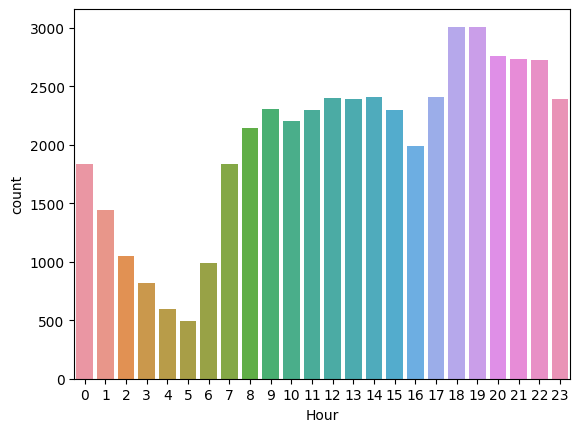

In [34]:
sns.countplot(x=df.Hour, data=df)

In [35]:
df.head()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,Year,Weekday,Hour,Distance_KM
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,2009,0,17,0.640487
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,16,5.250670
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,2011,3,0,0.863411
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,2012,5,4,1.739386
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,2010,1,7,1.242218


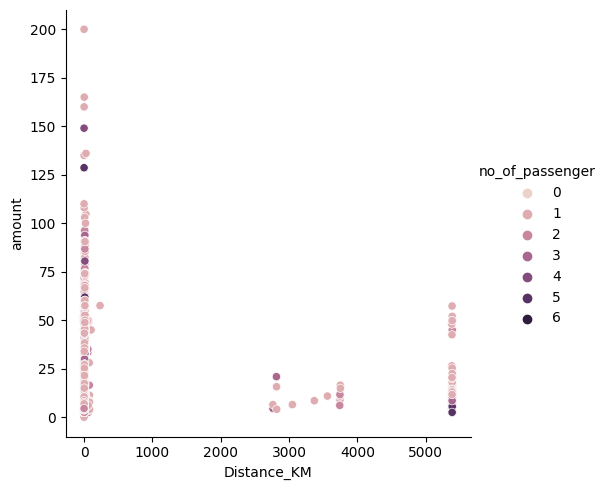

In [36]:
sns.relplot(x = df.Distance_KM, y = df.amount,hue=df.no_of_passenger, data=df)

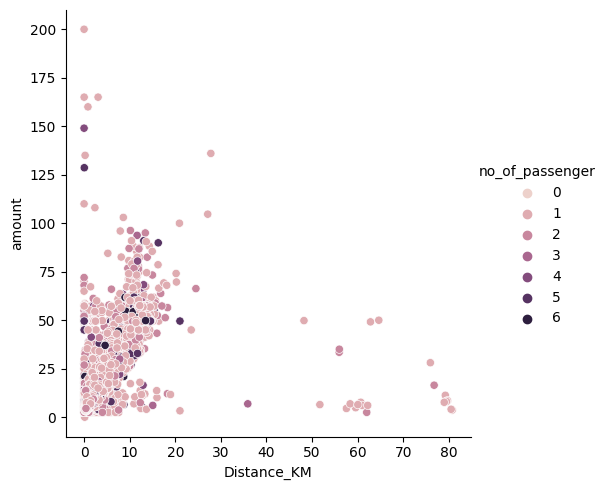

In [37]:
sns.relplot(x = df1.Distance_KM, y = df1.amount,hue=df1.no_of_passenger, data=df1)

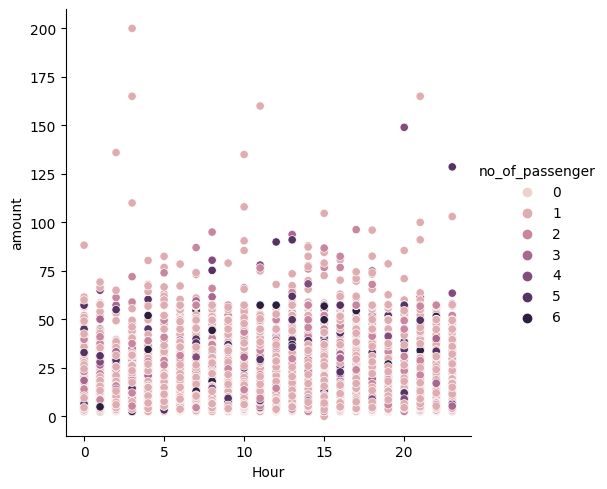

In [38]:
sns.relplot(x = df1.Hour, y = df1.amount,hue=df1.no_of_passenger, data=df1)

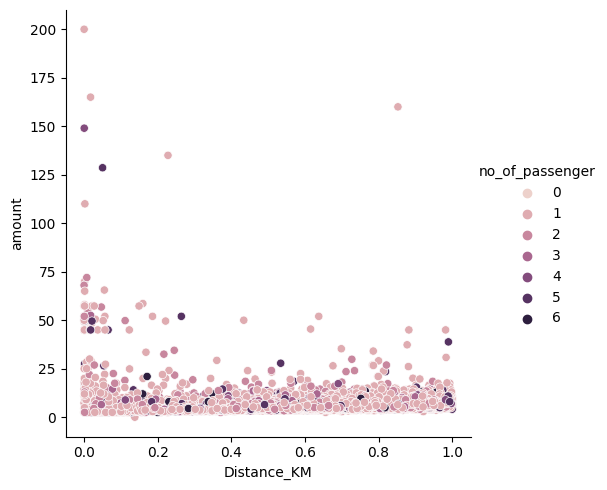

In [39]:
df2 = df[df.Distance_KM < 1]
sns.relplot(x = df2.Distance_KM, y = df2.amount,hue=df2.no_of_passenger, data=df2)

In [40]:
#We can observe some trips have 0 distance but paid a good amount of money, these trips may be round trips
#One person even paid 200 dollars for nearly 0 distance
#So we remove datasets for which distance is less than 50 metres(0.05 KM)

df = df[df.Distance_KM > 0.05]


In [41]:
df3 = df[df.Distance_KM < 1]

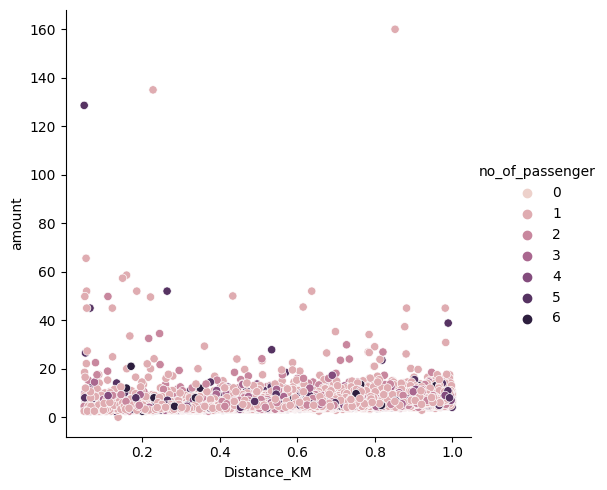

In [42]:
sns.relplot(x = df3.Distance_KM, y = df3.amount,hue=df3.no_of_passenger, data=df3)

In [43]:
df.size

482770

In [44]:
len(df)

48277

In [45]:
df.groupby('no_of_passenger')['Distance_KM', 'amount'].mean()

,Distance_KM,amount
no_of_passenger,,
0,134.872548,9.495679
1,12.099280,11.167937
2,8.574646,11.946255
3,9.793219,11.257191
4,23.970341,11.371047
5,8.599067,11.343404
6,7.760527,12.494830


In [46]:
#Removing rows with 0 passengers

df = df[df.no_of_passenger > 0]

In [47]:
df.groupby('no_of_passenger')['Distance_KM', 'amount'].mean()

,Distance_KM,amount
no_of_passenger,,
1,12.099280,11.167937
2,8.574646,11.946255
3,9.793219,11.257191
4,23.970341,11.371047
5,8.599067,11.343404
6,7.760527,12.494830


In [48]:
df.head()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,Year,Weekday,Hour,Distance_KM
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,2009,0,17,0.640487
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,16,5.250670
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,2011,3,0,0.863411
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,2012,5,4,1.739386
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,2010,1,7,1.242218


In [49]:
#Removing the points going outside the city by using google maps and some estimation as city is not in rectangular shape

xlim = [-74.03, -73.85]
ylim = [40.70, 40.85]

df4 = df.copy()

df4 = df4[(df4.longitude_of_pickup > xlim[0]) & (df4.longitude_of_pickup < xlim[1])]
df4 = df4[(df4.longitude_of_dropoff > xlim[0]) & (df4.longitude_of_dropoff < xlim[1])]
df4 = df4[(df4.latitude_of_pickup > ylim[0]) & (df4.latitude_of_pickup < ylim[1])]
df4 = df4[(df4.latitude_of_dropoff > ylim[0]) & (df4.latitude_of_dropoff < ylim[1])]


In [50]:
train_df = df4[df4.Distance_KM >= 0.05]

In [51]:
len(train_df)

44477

In [52]:
train_df.head()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,Year,Weekday,Hour,Distance_KM
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,16,5.250670
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,2011,3,0,0.863411
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,2012,5,4,1.739386
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,2010,1,7,1.242218
5,12.1,-74.000964,40.731630,-73.972892,40.758233,1,2011,3,9,2.353281


In [53]:
model_df = train_df[['no_of_passenger','Year','Weekday','Hour','Distance_KM','amount']]

In [54]:
model_df.head()

,no_of_passenger,Year,Weekday,Hour,Distance_KM,amount
1,1,2010,1,16,5.250670,16.9
2,2,2011,3,0,0.863411,5.7
3,1,2012,5,4,1.739386,7.7
4,1,2010,1,7,1.242218,5.3
5,1,2011,3,9,2.353281,12.1


In [55]:
x = model_df[['Year', 'Hour', 'Distance_KM', 'no_of_passenger']]
y = model_df[['amount']]

In [56]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [57]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [58]:
model.score(x_test, y_test)

0.7331106795374926

In [59]:
model.score(x_train, y_train)

0.7110185676738684

In [60]:
predictions = model.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test, predictions)

0.7331106795374926

In [61]:
from sklearn.tree import DecisionTreeRegressor
model1 = DecisionTreeRegressor(max_depth=4)
model1.fit(x_train, y_train)
model1.score(x_test, y_test)

0.7104837075410528

In [62]:
model1.score(x_train, y_train)

0.730522887076059

In [63]:
from sklearn.ensemble import BaggingRegressor
model2 = BaggingRegressor(base_estimator=model1)
model2.fit(x_train, y_train)
model2.score(x_test, y_test)

0.7368051961766096

In [64]:
model2.score(x_train, y_train)

0.7402958207790258

In [65]:
from sklearn.ensemble import GradientBoostingRegressor
model3 = GradientBoostingRegressor()
model3.fit(x_train, y_train)
model3.score(x_test, y_test)

0.7459301302767904

In [66]:
model3.score(x_train, y_train)

0.774190345688319

In [67]:
from sklearn.ensemble import RandomForestRegressor
model4 = RandomForestRegressor(n_estimators=100)
model4.fit(x_train, y_train)
model4.score(x_test, y_test)

0.7217630633931863

In [68]:
model4.score(x_train, y_train)

0.9575641764180863

In [69]:
from sklearn.ensemble import AdaBoostRegressor
model5 = AdaBoostRegressor(n_estimators=2, base_estimator=model1)
model5.fit(x_train, y_train)
model5.score(x_test, y_test)

0.6988086853740828

In [70]:
model5.score(x_train, y_train)

0.7096420901911721

In [71]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
x1 = sc_x.fit_transform(x)
y1 = sc_y.fit_transform(y)
x_train1, x_test1, y_train1, y_test1 = train_test_split(x1, y1, test_size=0.3, random_state=42)
model6 = SVR(kernel = 'rbf')
model6.fit(x_train1, y_train1)

SVR()

In [72]:
model6.score(x_test1, y_test1)

0.7644820219113213

In [73]:
model6.score(x_train1, y_train1)

0.7444877816773097

In [74]:
#I was getting negative score without using Standard_Scalar. When I browsed about it, I found that there a common preprocessing step called StadardScalar
#I learnt about it and used it in SVR


#SVR IS THE BEST MODEL as we got 0.76448 score which is the highest

In [75]:
print("SVR is the best model with Score = " + str(model6.score(x_test1, y_test1)))

SVR is the best model with Score = 0.7644820219113213


In [76]:
print("R2 Score = " + str(r2_score(y_test, predictions)))

R2 Score = 0.7331106795374926
